## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

## Load and Explore the Data

In [2]:
df = pd.read_csv("./data/Bengaluru_House_Data.csv")
df.head(n = 10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

Investigate the independent variable "area_type" and size by grouping all the samples of respective categories and counting the number of samples 

In [4]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.groupby("size")["size"].agg("count")

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

First try to build a simple model with dropping the indepent variables area_type, society, balcony and availability. So, we are left with location, size, total_sqft, bath and our dependent variable price.

In [6]:
df1 = df.drop(["area_type", "availability", "society", "balcony"], axis = "columns")
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

Looking for the NaN values and handling them. if the number of NaN values are small compared to the total number of samples, we will just drop the values. Otherwise we will try to replace the NaN values with some other value according to the type of independent variable.

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2.shape

(13246, 5)

We have dropped couple of columns from the dataframe and also removed the NaN values from the data. But there is a confusion in the column size. We can see BHK is a term that we still do not fully understand. For that, we look into the variable more closely to see all the unique values this column posseses.

In [10]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

From BHK and Bedrooms are basically the same, so we create a new column "bedrooms" which contains the number of bedrooms for the house.

In [11]:
df2["bedrooms"] = df2["size"].apply(lambda x:int(x.split(" ")[0]))

C:\Users\iiaka\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2["bedrooms"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df2.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Moving onto the column total_sqft

In [14]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

We see some values which are not a single value rather a range. We can handle this by adding the upper and lower range and taking the average of the two numbers.

In [15]:
def is_float(x):
    """function to check the samples that are not a value rather a range by trying to convert the value to float"""
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2["total_sqft"].apply(is_float)].head(n = 10)

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


The column total_sqft has multiple discrepancies. First we need to change the range to number values. Then we also see some sample that are in square meters and also in Perch unit. For now we will ignore these values.

In [17]:
def range_to_num(x):
    
    """function that converts the range numbers of total_sqft column to a single number by 
    taking the average of upper and lower range"""
    
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2 #average of the upper and lower range
    try:
        return float(x)
    except:
        return None

In [18]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(range_to_num)
df3.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df4 = df3.drop(["size"], axis = "columns")
df4.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


Our data looks a lot cleaner now. We have taken care of range and unknown values in the total_sqft column and transformed the size column into bedrooms column and also taken care of the NaN values. Now we will add another column in our dataframe which is the price per square feet. We will achieve this by dividing the price column by the total_sqft column.

In [20]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]
df5.head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


Looking into the location feature and checking the number of unique samples in the location column.

In [21]:
df5["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
len(df5["location"].unique())

1304

Too many locations in the location feature. Let's explore more by counting the total number of samples for each unqiue location.

In [23]:
df5.location = df5.location.apply(lambda x:x.strip())    #strip the spacing in the location strings
location_stats = df5.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats <= 10])

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats <= 10]   #locations which have less than 10 entries
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [26]:
len(df5.location.unique())

1293

In [27]:
df5.location = df5.location.apply(lambda x: "Other" if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [28]:
df5.head(n = 10)

,location,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Other,1020.0,6.0,370.00,6,36274.509804


## Outlier Detection and Removal

First we will define that a single bedroom house requires at least 300 square feet of area. But there are a couple of values in our dataframe where this doest not match. So, we say that those samples are outliers and we remove them from our data.

In [29]:
df5[df5.total_sqft / df5.bedrooms < 300].head()

,location,total_sqft,bath,price,bedrooms,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000


In [30]:
df5.shape

(13246, 6)

In [31]:
df6 = df5[~(df5.total_sqft / df5.bedrooms < 300)]
df6.shape

(12502, 6)

In [32]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    """removes outliers from the price_per_sqft column by taking the values which are in between
    one standard deviation from the mean of the data"""
    
    df_out = pd.DataFrame()
    for key, subdf in df6.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [34]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 6)

Now we move on to removing the outliers from the bedrooms feature. Here we make the assumption that the houses which have less number of bedrooms also have less price. So if we see any pattern in the data where a 2 bedroom house has more price than a 3 bedroom house, we remove that sample from the data. But to do that we first need a function which scatter plots the price of the houses with respect to number of bedrooms.

In [35]:
def plot_scatter_chart(df, location):
    
    """function to plot scatter charts of number of bedrooms and price according to location"""
    
    bedroom_2 = df[(df.location == location) & (df.bedrooms == 2)]
    bedroom_3 = df[(df.location == location) & (df.bedrooms == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(bedroom_2.total_sqft, bedroom_2.price, color = "blue", label = "2 Bedroom", s = 50)
    plt.scatter(bedroom_3.total_sqft, bedroom_3.price, marker = "+", color = "red", label = "3 Bedroom", s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.grid()
    plt.legend()
    plt.show()

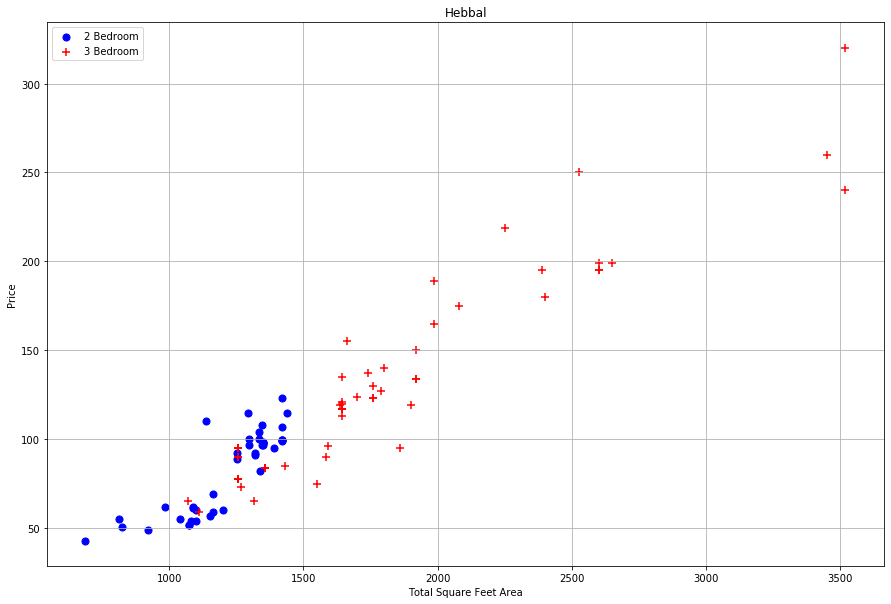

In [36]:
plot_scatter_chart(df7, "Hebbal")

We see that there are certain samples in our data, where for the same total square feet area the price of the 3 bedroom houses are lower than the price of 2 bedroom houses, more specifically within the total square feet area range of 1000 to 1500. We can deem these samples as outliers and remove them from our data.

In [37]:
def remove_bedrooms_outliers(df):
    
    """function to remove outliers from the data in terms if number of bedrooms"""
    
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bedrooms_stats = {}
        for bedrooms, bedrooms_df in location_df.groupby("bedrooms"):
            bedrooms_stats[bedrooms] = {
                "mean":np.mean(bedrooms_df.price_per_sqft),
                "std":np.std(bedrooms_df.price_per_sqft),
                "count":bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby("bedrooms"):
            stats = bedrooms_stats.get(bedrooms - 1)
            if stats and stats["count"] > 5:
                exclude_indices =  np.append(exclude_indices, bedrooms_df[bedrooms_df.price_per_sqft < (stats["mean"])].index.values)
    return df.drop(exclude_indices, axis = "index")

In [38]:
df8 = remove_bedrooms_outliers(df7)
df8.shape

(7329, 6)

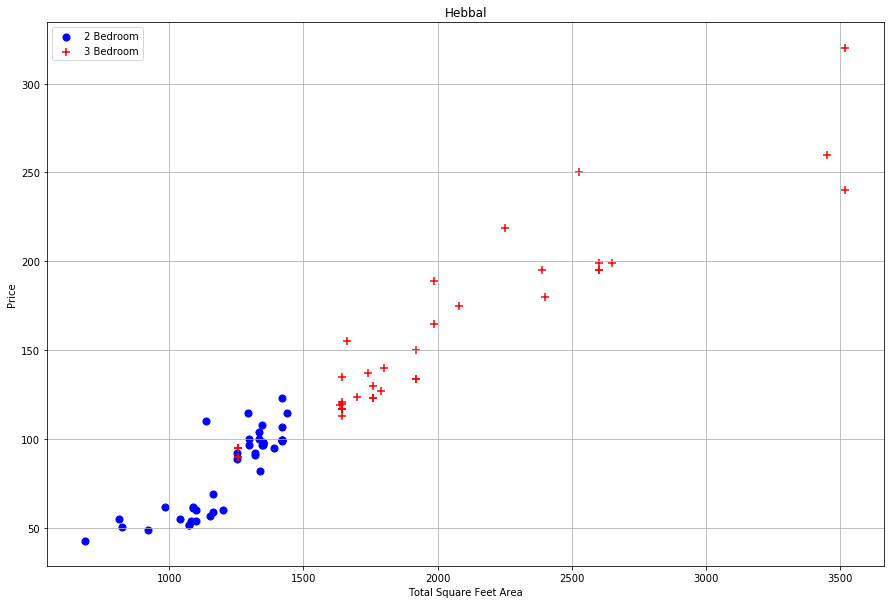

In [39]:
plot_scatter_chart(df8, "Hebbal")

We see that majority of the data points that we assumed as outliers are removed.

No handles with labels found to put in legend.


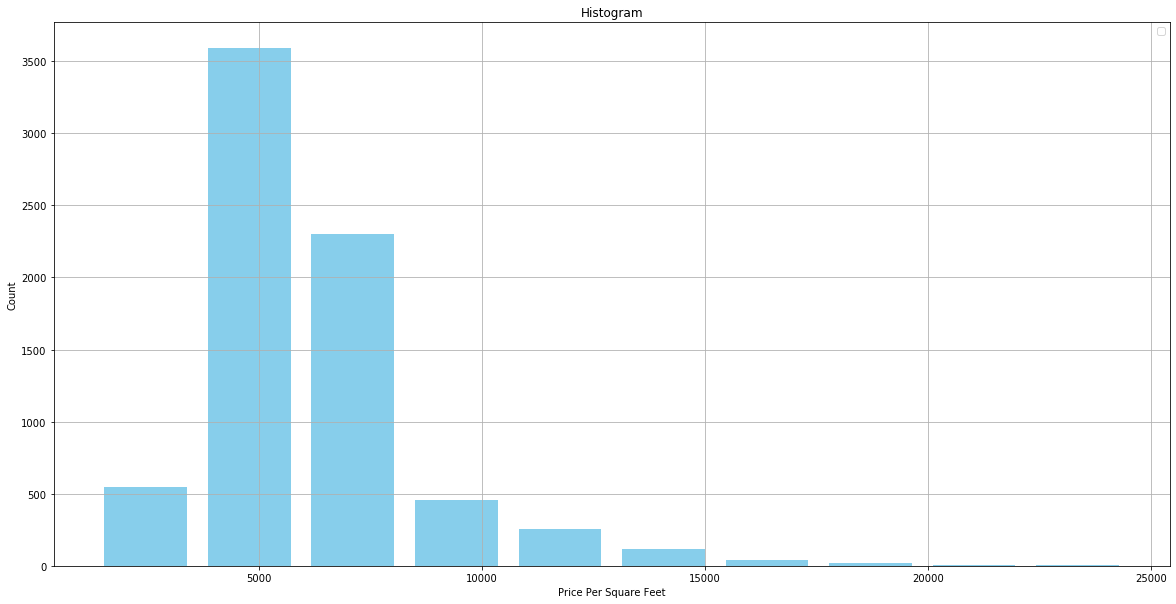

In [40]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth = 0.8, color = "skyblue")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.title("Histogram")
plt.grid()
plt.legend()
plt.show()

In [41]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df8[df8.bath > 10]

,location,total_sqft,bath,price,bedrooms,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
5925,Other,12000.0,12.0,525.0,10,4375.000000
6014,Other,10000.0,16.0,550.0,16,5500.000000
6747,Other,6000.0,12.0,150.0,11,2500.000000
7078,Other,5425.0,13.0,275.0,13,5069.124424


No handles with labels found to put in legend.


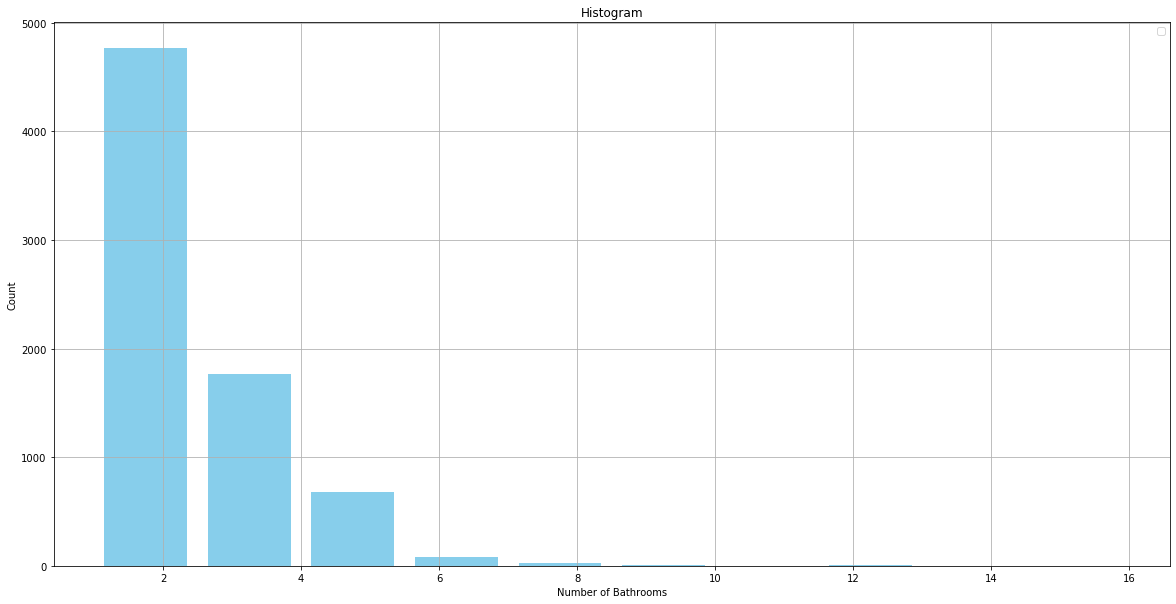

In [43]:
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.bath, rwidth = 0.8, color = "skyblue")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.title("Histogram")
plt.grid()
plt.legend()
plt.show()

Most of the properties have 2 bathrooms. To remove the outliers from the bathrooms column we assume that if the number of bathroom of any property is more than the number of bedrooms + 2 of that property then the sample is an outlier. So first we try to see if there are any samples which satisfy this cirteria and can be deemed as an outlier.

In [44]:
df8[df8.bath > df8.bedrooms + 2]

,location,total_sqft,bath,price,bedrooms,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
5850,Other,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,1806.0,6.0,116.0,3,6423.034330


In [45]:
df9 = df8[df8.bath < df8.bedrooms + 2]
df9.shape

(7251, 6)

Now we can drop the price_per_sqft column because we only used that feature for detection of outliers.

In [46]:
df10 = df9.drop(["price_per_sqft"], axis = "columns")
df10.head()

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Our dataset is clean. Outliers are removed. NaN and missing values are taken care of. So, the feature selection and feature engineering parts are done. We can move on to the model creation part of our project.

We still have a feature location which contain string values. We need to change the string values by means of one hot encoding before feeding the data into our machine learning model.

In [47]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## One hot encoding

In [48]:
df11 = pd.concat([df10, dummies.drop("Yeshwanthpur", axis = "columns")], axis = "columns")
df11.head()

,location,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df12 = df11.drop("location", axis = "columns")
df12.head()

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12.shape

(7251, 245)

In [51]:
X = df12.drop('price', axis = "columns")
X.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X.shape

(7251, 244)

In [53]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [54]:
y.shape

(7251,)

## Splitting the data into train and test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## A Simple Linear Regression Model

In [56]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8691914452174423

## K-fold Cross Validation

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.79517703, 0.86258341, 0.82158707, 0.86002823, 0.89247326])

## Hyperparameter tuning using GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [59]:
def find_best_model_params(X, y):
    
    """function to find the best model and their parameters from a dictionary of defined models and their corresponding parameters
    *args: X = train data
           y = test data
    returns: a dataframe of best scores for each model and param combination"""
    # Create the dictionary for individual regressor models and their corresponding hyperparameters
    algos = {
        "linear_regression":{
            "model":LinearRegression(),
            "params":{
                "normalize":[True, False]
            }
        },
        "lasso":{
            "model":Lasso(),
            "params":{
                "alpha":[1,2],
                "selection":["random", "cyclic"]
            }
        },
        "decision_tree":{
            "model":DecisionTreeRegressor(),
            "params":{
                "criterion":["mse", "friedman_mse"],
                "splitter":["best", "random"]
            }
        }
    }
    
    scores = []
    # Cross Validation object
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    # Loop through the algos dictionary and train the models
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            "model":algo_name,
            "best_score":gs.best_score_,
            "best_params":gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=["model", "best_score","best_params"])

In [60]:
find_best_model_params(X,y)

,model,best_score,best_params
0,linear_regression,0.853373,{'normalize': False}
1,lasso,0.740145,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.749009,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


The best model is linear regression with the hyperparameter normalize set to False.

## Predict the house price with the trained model

In [61]:
def predict_price(location, sqft, bath, bedrooms):
    
    """function to predict the price of the house. retruns the price prediction"""
    
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

Let us try out our predict function by giving manual inputs.

In [62]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

82.819810313778

In [63]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

79.65568746351407

In [64]:
predict_price('Indira Nagar', 1000, 2, 2)

179.37066882808296

In [65]:
predict_price('Indira Nagar', 1000, 3, 3)

177.68734072817995

## Exoprt the model to a pickle file

In [66]:
import pickle
with open('house_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

Other than the actual trained model we also need the columns information of the dataset in order to make a prediction. We will do that with the help of json where all the column information and their structure will be present.

In [67]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

This pickle and json file will be used for building our flask server. 

## Building the Python Flask Server